In [ ]:
https://github.com/TirendazAcademy/DATA-VISUALIZATION-WITH-PYTHON/blob/main/06-Scatter%20Plot%20with%20Matplotlib.ipynb


Simple Scatter Plots
biểu đồ phân tán đơn giản, một người anh em họ hàng gần của biểu đồ dòng. Thay vì các điểm được nối bằng các đoạn thẳng, ở đây các điểm được biểu diễn riêng lẻ bằng một dấu chấm, hình tròn hoặc hình dạng khác. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Scatter Plots with plt.plot


Trong phần trước, chúng ta đã xem xét plt.plot / ax.plot để tạo ra các biểu đồ dòng. Nó chỉ ra rằng cùng một chức năng này cũng có thể tạo ra các biểu đồ phân tán:

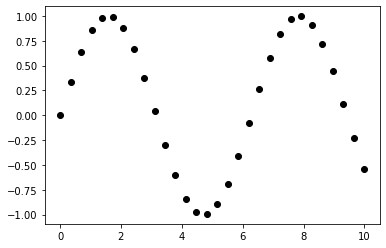

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Scatter Plots with plt.scatter


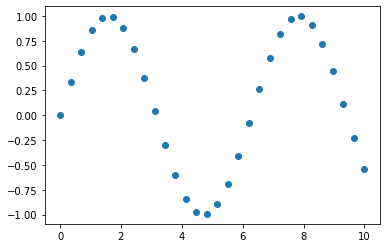

In [ ]:
plt.scatter(x, y, marker='o');


Sự khác biệt cơ bản của plt.scatter so với plt.plot là nó có thể được sử dụng để tạo các biểu đồ phân tán trong đó các thuộc tính của từng điểm riêng lẻ (kích thước, màu mặt, màu cạnh, v.v.) có thể được điều khiển riêng hoặc ánh xạ tới dữ liệu.

Hãy thể hiện điều này bằng cách tạo một biểu đồ phân tán ngẫu nhiên với các điểm có nhiều màu sắc và kích thước. Để thấy rõ hơn các kết quả chồng chéo, chúng tôi cũng sẽ sử dụng từ khóa alpha để điều chỉnh mức độ minh bạch:


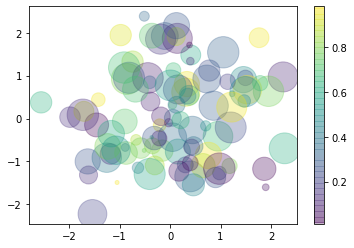

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Ví dụ: chúng tôi có thể sử dụng dữ liệu Iris từ Scikit-Learn, trong đó mỗi mẫu là một trong ba loại hoa đã được đo lường cẩn thận về kích thước của cánh hoa và đài hoa:

Chúng ta có thể thấy rằng biểu đồ phân tán này đã cho chúng ta khả năng khám phá đồng thời bốn chiều khác nhau của dữ liệu: vị trí (x, y) của mỗi điểm tương ứng với chiều dài và chiều rộng của đài hoa, kích thước của điểm có liên quan đến cánh hoa. chiều rộng và màu sắc có liên quan đến loài hoa cụ thể. Các biểu đồ phân tán nhiều màu và đa tính năng như thế này có thể hữu ích cho cả việc khám phá và trình bày dữ liệu.


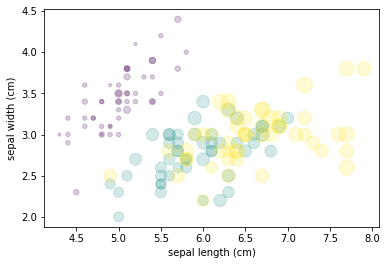

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Đôi khi giá trị mặc định của chú giải không đủ cho hình ảnh đã cho. Ví dụ: có lẽ bạn đang sử dụng kích thước của các điểm để đánh dấu các đặc điểm nhất định của dữ liệu và muốn tạo một chú giải phản ánh điều này. Đây là một ví dụ trong đó chúng tôi sẽ sử dụng kích thước của các điểm để chỉ ra dân số của các thành phố California. Chúng tôi muốn một chú giải xác định tỷ lệ kích thước của các điểm và chúng tôi sẽ thực hiện điều này bằng cách vẽ một số dữ liệu được gắn nhãn không có mục nhập:

   Unnamed: 0      city       latd       longd  elevation_m  elevation_ft  \
0           0  Adelanto  34.576111 -117.432778        875.0        2871.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


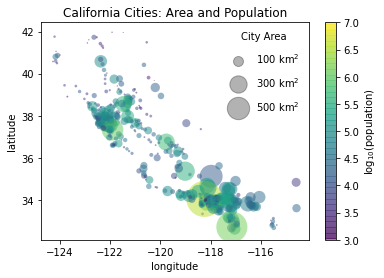

In [10]:
import pandas as pd
cities = pd.read_csv('/content/drive/MyDrive/Tổng hợp sách/data vizualization/Datasets/california_cities.csv')

print(cities.head(1))

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

Cuối cùng, hãy lưu ý rằng đối với dữ liệu địa lý như thế này, sẽ rõ ràng hơn nếu chúng ta có thể hiển thị ranh giới tiểu bang hoặc các yếu tố cụ thể khác của bản đồ. Đối với điều này, một lựa chọn công cụ tuyệt vời là bộ công cụ bổ trợ Bản đồ cơ sở của Matplotlib, mà chúng ta sẽ khám phá trong Dữ liệu địa lý với Bản đồ cơ sở.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


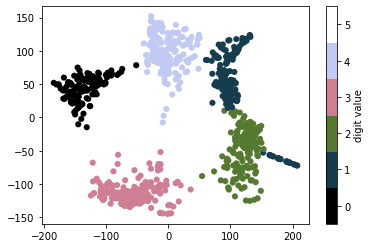

In [11]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

Bởi vì mỗi chữ số được xác định bởi màu sắc của 64 pixel của nó, chúng ta có thể coi mỗi chữ số là một điểm nằm trong không gian 64 chiều: mỗi chiều đại diện cho độ sáng của một pixel. Nhưng việc hình dung các mối quan hệ trong không gian nhiều chiều như vậy có thể cực kỳ khó khăn. Một cách để tiếp cận điều này là sử dụng kỹ thuật giảm thứ nguyên như học đa tạp để giảm kích thước của dữ liệu trong khi vẫn duy trì các mối quan hệ quan tâm. Giảm kích thước là một ví dụ về học máy không có giám sát và chúng ta sẽ thảo luận chi tiết hơn về vấn đề này trong Học máy là gì ?.

In [ ]:
#Create numpy arrays

import numpy as np
x = np.linspace(0,5,11)
y = x ** 2
print(x)
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


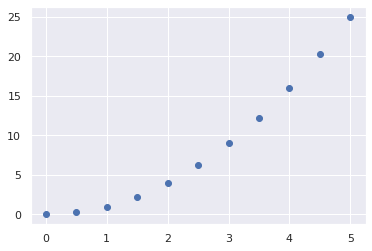

In [ ]:
# Create scatter plot
plt.scatter(x,y)

In addition to the regular plot method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:



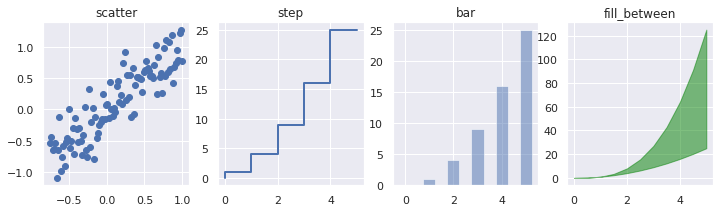

In [ ]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

# fig, ax = plt.subplots()

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");